Reports are a great way to share your work with others. Thanks to Quarto and Datadex, you can create beautiful reports with a few lines of code and share them with the world.
Let's go through a few interesting things we can do.

Starting with the most basic thing, we can display Pandas DataFrames as tables.

In [17]:
# | label: tbl-planets
# | tbl-cap: Planets

from IPython.display import Markdown
from tabulate import tabulate

table = [
    ["Sun", 696000, 1989100000],
    ["Earth", 6371, 5973.6],
    ["Moon", 1737, 73.5],
    ["Mars", 3390, 641.85],
]
Markdown(tabulate(table, headers=["Planet", "R (km)", "mass (x 10^29 kg)"]))


Planet      R (km)    mass (x 10^29 kg)
--------  --------  -------------------
Sun         696000           1.9891e+09
Earth         6371        5973.6
Moon          1737          73.5
Mars          3390         641.85

And, of course, plotting arbitrary data is easy. 

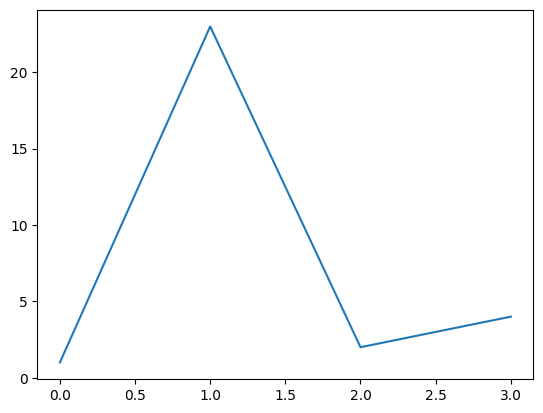

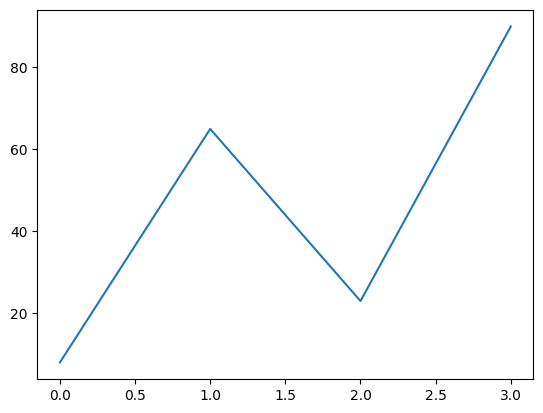

In [18]:
# | label: fig-charts
# | fig-cap: "Charts"
# | fig-subcap:
# |   - "First"
# |   - "Second"
# | layout-ncol: 2

import matplotlib.pyplot as plt

plt.plot([1, 23, 2, 4])
plt.show()

plt.plot([8, 65, 23, 90])
plt.show()


We can improve the graphs making them dynamic!

In [19]:
# | column: page

import altair as alt
import pandas as pd
import numpy as np

alt.themes.enable("vox")

np.random.seed(42)
source = pd.DataFrame(
    np.cumsum(np.random.randn(100, 3), 0).round(2),
    columns=["A", "B", "C"],
    index=pd.RangeIndex(100, name="x"),
)
source = source.reset_index().melt("x", var_name="category", value_name="y")

# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection_point(nearest=True, on="mouseover", fields=["x"], empty=False)

# The basic line
line = (
    alt.Chart(source)
    .mark_line(interpolate="basis")
    .encode(x="x:Q", y="y:Q", color="category:N")
)

# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = (
    alt.Chart(source)
    .mark_point()
    .encode(
        x="x:Q",
        opacity=alt.value(0),
    )
    .add_params(nearest)
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align="left", dx=5, dy=-5).encode(
    text=alt.condition(nearest, "y:Q", alt.value(" "))
)

# Draw a rule at the location of the selection
rules = (
    alt.Chart(source)
    .mark_rule(color="gray")
    .encode(
        x="x:Q",
    )
    .transform_filter(nearest)
)

# Put the five layers into a chart and bind the data
alt.layer(line, selectors, points, rules, text).properties(
    width="container", height=400
)


alt.LayerChart(...)

Since we're in the Datadex environment, we can access the dbt models in out local DuckDB database.

In [20]:
# | column: page

from datadex.utils import query

df = query("from climate_co2_global_trend")

c = (
    alt.Chart(df)
    .mark_line()
    .encode(
        x=alt.X("date:T", title="Date"),
        y=alt.Y("trend:Q", scale=alt.Scale(domain=[390, 430]), title="CO2 (ppm)"),
        tooltip=[
            alt.Tooltip("date:T", title="Date"),
            alt.Tooltip("trend:Q", title="CO2 (ppm)"),
        ],
    )
    .properties(width="container", height=400)
)

c.display()


alt.Chart(...)

Same with Dagster assets! The following code will run the asset function! Great for debugging. 

In [21]:
from datadex import assets as datasets

datasets.raw_threatened_animal_species().head(10)


taxonid kingdom_name   phylum_name     class_name order_name family_name  \
0    31583      PLANTAE  TRACHEOPHYTA  MAGNOLIOPSIDA   MYRTALES   MYRTACEAE   
1    31584      PLANTAE  TRACHEOPHYTA  MAGNOLIOPSIDA   MYRTALES   MYRTACEAE   
2    31585      PLANTAE  TRACHEOPHYTA  MAGNOLIOPSIDA   MYRTALES   MYRTACEAE   
3    31586      PLANTAE  TRACHEOPHYTA  MAGNOLIOPSIDA   MYRTALES   MYRTACEAE   
4    31587      PLANTAE  TRACHEOPHYTA  MAGNOLIOPSIDA   MYRTALES   MYRTACEAE   
5    31588      PLANTAE  TRACHEOPHYTA  MAGNOLIOPSIDA   MYRTALES   MYRTACEAE   
6    31589      PLANTAE  TRACHEOPHYTA  MAGNOLIOPSIDA   MYRTALES   MYRTACEAE   
7    31590      PLANTAE  TRACHEOPHYTA  MAGNOLIOPSIDA   MYRTALES   MYRTACEAE   
8    31591      PLANTAE  TRACHEOPHYTA  MAGNOLIOPSIDA   MYRTALES   MYRTACEAE   
9    31592      PLANTAE  TRACHEOPHYTA  MAGNOLIOPSIDA   MYRTALES   MYRTACEAE   

  genus_name        scientific_name taxonomic_authority infra_rank infra_name  \
0    Eugenia      Eugenia oreophila              Ridley       None       None   
1    Eugenia         Eugenia orites              Ridley       None       None   
2    Eugenia    Eugenia pahangensis              Ridley       None       None   
3    Eugenia      Eugenia pallidula              Ridley       None       None   
4    Eugenia    Eugenia pearsoniana                King       None       None   
5    Eugenia     Eugenia perakensis                King       None       None   
6    Eugenia  Eugenia pergamentacea                King       None       None   
7    Eugenia         Eugenia polita                King       None       None   
8    Eugenia   Eugenia praestigiosa      M.R. Henderson       None       None   
9    Eugenia      Eugenia prainiana                King       None       None   

  population category main_common_name  
0       None    LR/lc             None  
1       None    LR/cd             None  
2       None    LR/cd             None  
3       None       VU             None  
4       None    LR/cd             None  
5       None    LR/lc             None  
6       None    LR/lc             None  
7       None    LR/lc             None  
8       None       DD             None  
9       None    LR/lc             None

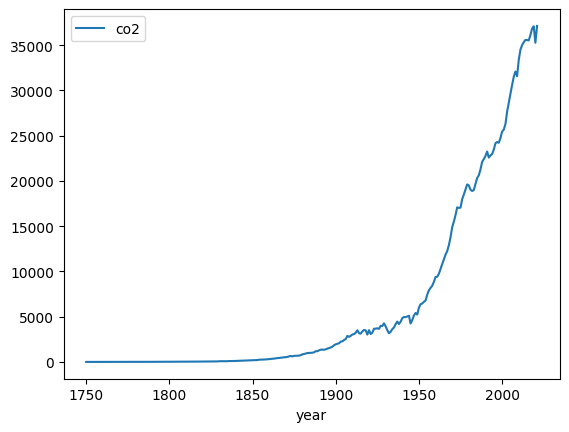

In [22]:
from datadex.utils import query

df = query("select * from climate_owid_co2_by_country where country = 'World'")
_ = df.plot(x="year", y="co2", kind="line")
